# Code:

we will work with the [Diabetes Data Set from Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database). 

We'll be trying to predict a classification- patient has diabetes or not.
Let's begin our understanding of implementing Logistic Regression in Python for classification.


## Import Libraries
Let's import some libraries to get started!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Selecting Feature:
    
Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [5]:
#split dataset in features and target variable
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = df[feature_cols] # Features
Y = df.Outcome # Target variable

In [6]:
print(X.shape)     # 769 rows and 7 columns
print(Y.shape)     # 769 rows with 1 column

(768, 8)
(768,)


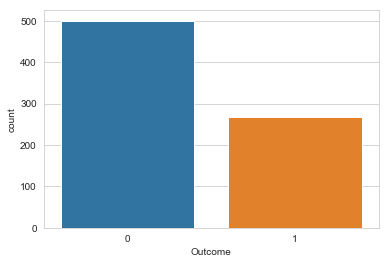

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=df)

In [8]:
df['Outcome'].unique()
# there are two classes of outcome

array([1, 0], dtype=int64)

## Splitting Data
### To understand model performance, dividing the dataset into a training set and a test set.

Let's split dataset by using function train_test_split(). we need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

#### Here, the Dataset is broken into two parts in a ratio of 70:30. It means 70% data will be used for model training and 30% for model testing.

In [10]:
# split X and Y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

## Model Development and Prediction
First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [11]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logit = LogisticRegression()

# fit the model with data
logit.fit(X_train,Y_train)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
# Prdicting Outcome using model
Y_pred=logit.predict(X_test)

## Model Evaluation using Confusion Matrix
A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [13]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[142,  15],
       [ 35,  39]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

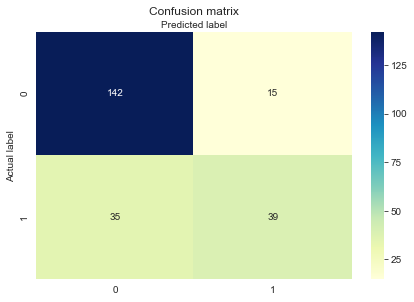

In [14]:
# graphical form
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [15]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.7835497835497836
Precision: 0.7222222222222222
Recall: 0.527027027027027


### This model gives 78 % accuracy 
Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 72% of the time.

Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 52% of the time.
## ROC Curve
### Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

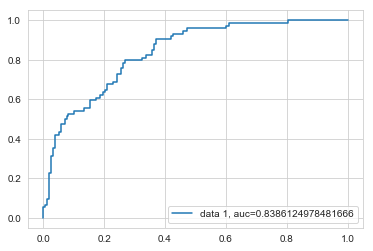

In [16]:
Y_pred_proba = logit.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### AUC score for the case is 0.83.
AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.